In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, ifftshift, fftshift, dst, idst, dstn, idstn

from classicalfield import FiniteTempGPE as gpe

No vortices to be spawned
Total Imag Time:  50.16892743110657


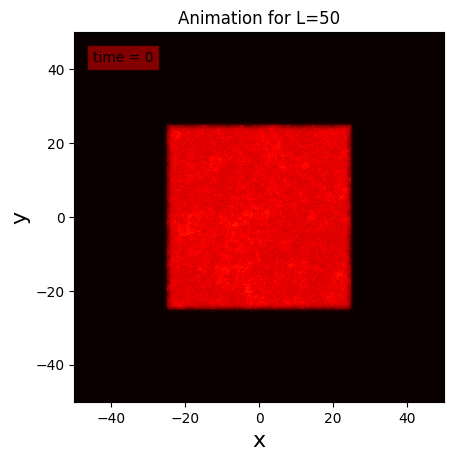

No vortices to be spawned
Total Imag Time:  52.00504779815674


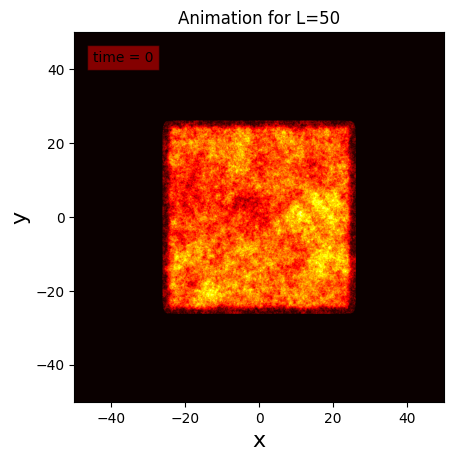

In [2]:
gd = gpe(runAnim = True, animFileName = 'testlowpot', Nsamples = 1)
g =  gpe(runAnim = True, animFileName = 'testlowpot', Nsamples = 1, dst = False)

Text(0.5, 1.0, 'Position Wavefunction: DST, potential height = 5')

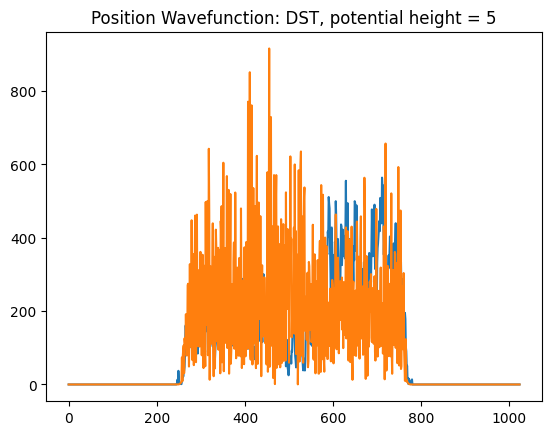

In [3]:
plt.figure() 
plt.plot(np.abs(g.wf_samples[0][len(g.wf_samples[0])//2])**2)
plt.plot(np.abs(gd.wf_samples[0][len(g.wf_samples[0])//2])**2)
#plt.plot(np.abs(g.snaps[-1][len(g.wf_samples[0])//2])**2)
plt.title('Position Wavefunction: DST, potential height = 5')

debugging the initial wavefunction state

In [4]:
randr = np.random.normal(size = (len(g.ki[0]), len(g.ki[0]))) 
randi = np.random.normal(size = (len(g.ki[0]), len(g.ki[0]))) 


#coef = np.sqrt(np.divide(2*g.T,(g.ki[0]**2 + g.ki[1]**2),out = np.zeros_like(g.ki[0]), where=(g.ki[0]**2 + g.ki[1]**2)!=0))
coef = np.sqrt(np.divide(2*g.T,(g.ki[0]**2 + g.ki[1]**2),out = np.zeros_like(g.ki[0]), where=np.abs(g.ki[0]**2 + g.ki[1]**2)>1e-6))


#return coef * (randr + 1j * randi)

psik_rand = np.multiply(coef, (randr + 1j * randi)/np.sqrt(2))

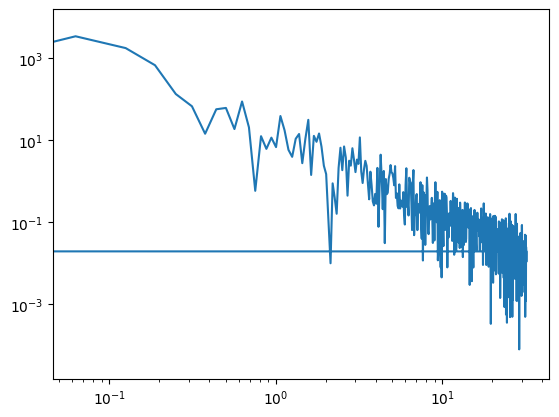

In [5]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(psik_rand[0])**2)
plt.yscale('log')
plt.xscale('log')

In [56]:
coef=g.winL/g.dx**2
#coef = 1
ksamples = np.zeros((g.Nsamples, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)
psix_arr = np.zeros((g.Nsamples, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)
thermal_wf_samples = np.zeros((g.Nsamples, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)
for i in range(g.Nsamples): 
    ksamples[i] = g.genPsiK()
    psik_sp = coef * (ksamples[i])
    psix_arr[i] = ifft2(psik_sp) 
    thermal_sample = g.gs + psix_arr[i] 
    thermal_sample[np.abs(g.gs)<0.1] = 0
    norm = np.sum(np.abs(thermal_sample)**2 * g.dx**2)

    thermal_wf_samples[i] = np.sqrt(g.gpeobj.Natoms/norm)*thermal_sample
average_result = np.mean(np.abs(coef*ksamples)**2, axis = 0, dtype = np.complex_) # average of the noisy k samples 

wf_samples = thermal_wf_samples 
average_thnoise = average_result 

In [134]:

coef = coef/2
#coef = 1/2
ksamples_d = np.zeros((gd.Nsamples, len(gd.ki[0][0]), len(gd.ki[0][0])), dtype = np.complex_)
psix_arr_d = np.zeros((gd.Nsamples, len(gd.ki[0][0]), len(gd.ki[0][0])), dtype = np.complex_)
thermal_wf_samples = np.zeros((gd.Nsamples, len(gd.ki[0][0]), len(gd.ki[0][0])), dtype = np.complex_)
for i in range(gd.Nsamples): 
    ksamples_d[i] = gd.genPsiK()
    #psik_sp = coef * (ksamples[i])
    innerbox = ifftshift(ksamples_d[i])[257:767, 257:767] # make this not hard coded later 
    psix_arr_d[i] = np.pad(idstn(coef*innerbox, type = 1), pad_width = (len(gd.gs)-len(innerbox))//2, mode = 'constant', constant_values = 0)

    thermal_sample = gd.gs + psix_arr_d[i] 
    thermal_sample[np.abs(gd.gs)<0.1] = 0
    norm = np.sum(np.abs(thermal_sample)**2 * gd.dx**2)

    thermal_wf_samples[i] = np.sqrt(gd.gpeobj.Natoms/norm)*thermal_sample
    average_result = np.mean(np.abs(coef*ksamples)**2, axis = 0, dtype = np.complex_) # average of the noisy k samples 

wf_samples = thermal_wf_samples 
average_thnoise = average_result

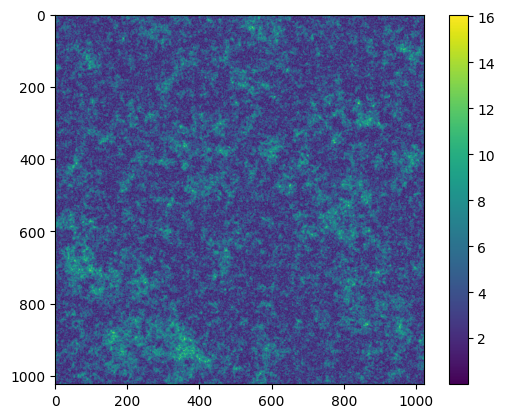

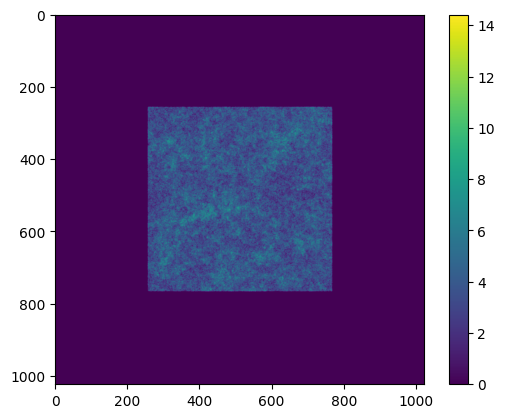

In [37]:
plt.figure() 
plt.imshow(np.abs(psix_arr[0]))
plt.colorbar() 
plt.show() 
plt.figure() 
plt.imshow(np.abs(psix_arr_d[0]))
plt.colorbar() 
plt.show() 

In [102]:
k_grid = np.linspace(ifftshift(g.ki[0][0])[0], ifftshift(g.ki[0][0])[-1], len(g.ki[0][0]))


In [103]:
print(k_grid)

[-32.16990877 -32.10707692 -32.04424507 ...  31.98141321  32.04424507
  32.10707692]


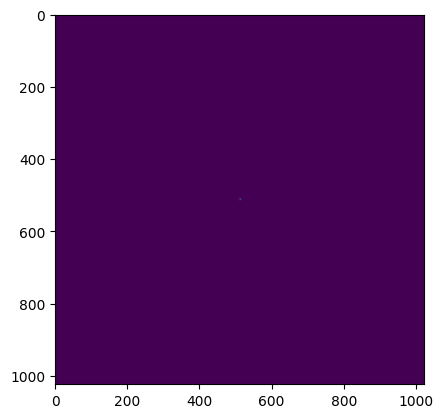

In [112]:
plt.imshow(ifftshift(np.abs(ksamples_d[0])**2))

In [117]:
print(np.shape(ifftshift(g.ki[0])[257:767, 257:767]))

(510, 510)


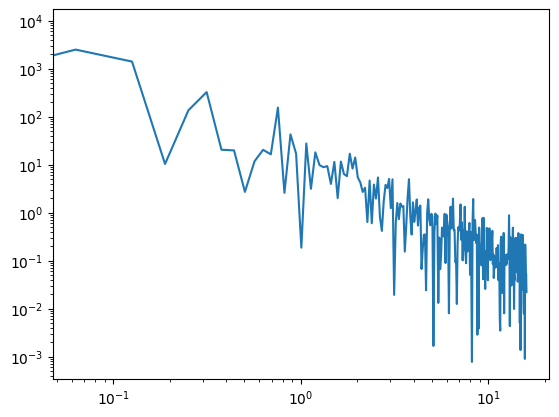

In [133]:
#innerbox = ifftshift(ksamples_d[i])[257:767, 257:767]

plt.figure() 
#plt.plot(k_grid[257:767], ifftshift(np.abs(ksamples_d[0])**2)[257:767, 257:767][len(ksamples_d[0][257:767, 257:767])//2])
plt.plot(k_grid[257:767], np.abs(innerbox[len(innerbox)//2])**2)
#plt.plot(k_grid[257:767], np.abs(ifftshift(ksamples_d[i])[257:767, 257:767][len(ifftshift(ksamples_d[i])[257:767, 257:767])//2])**2)
plt.yscale('log')
plt.xscale('log')


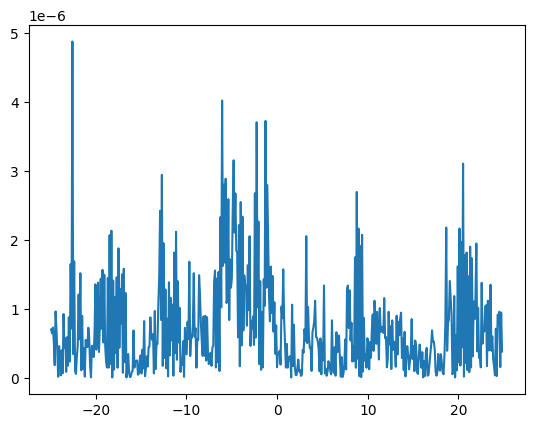

In [141]:
plt.plot(g.xi[0][0][257:767], np.abs(idstn(innerbox)[len(innerbox)//2])**2)

pos_space_noise = idstn(innerbox)[len(innerbox)//2]

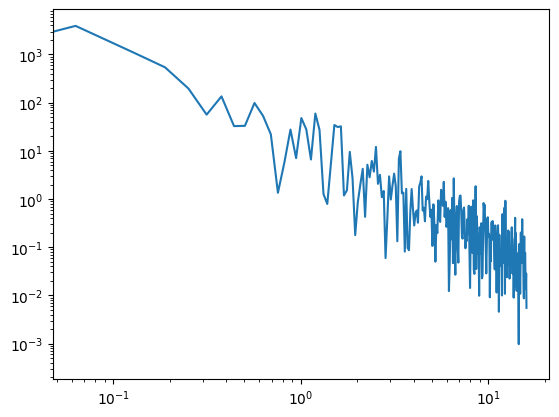

In [121]:
plt.figure() 
plt.plot(k_grid[257:767], np.abs(innerbox[len(innerbox)//2])**2)
plt.yscale('log')
plt.xscale('log')

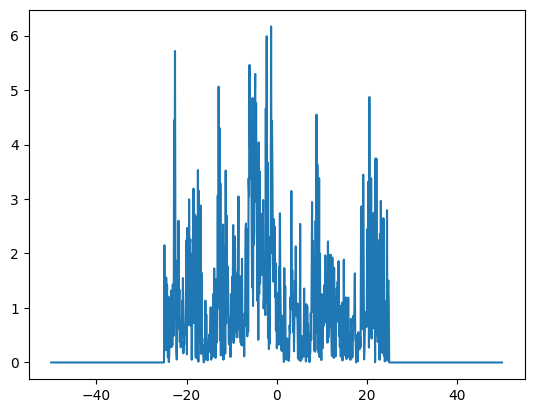

In [152]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(np.pad(idstn(coef*innerbox, type = 1), pad_width = (len(gd.gs)-len(innerbox))//2, mode = 'constant', constant_values = 0)[len(gd.gs)//2])**2)

psix_arr_d2 = np.pad(idstn(coef*innerbox, type = 1), pad_width = (len(gd.gs)-len(innerbox))//2, mode = 'constant', constant_values = 0)




C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


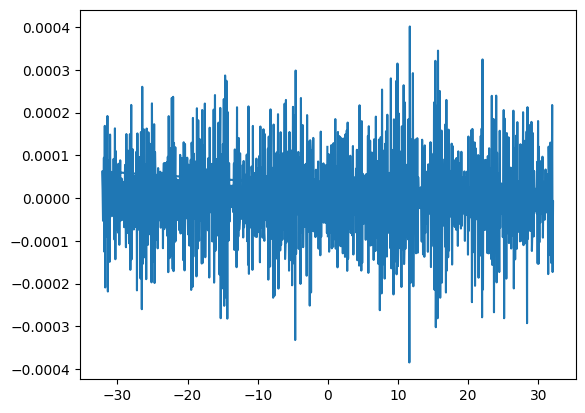

In [153]:
plt.plot(g.ki[0][0], ifft2(psix_arr_d2)[0]) ## TODO: Try to get this to be 1/k^2 dependence, see that you defined the array correctly and also try making sure
#taking the inverse dst and dst together yields the identity on the given array 

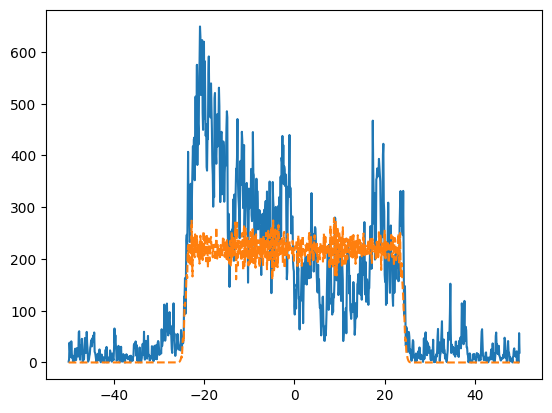

In [135]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.gs[len(g.gs)//2] + psix_arr[0][len(psix_arr[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.gs[len(g.gs)//2] + psix_arr_d[0][len(psix_arr_d[0])//2])**2, linestyle = '--')




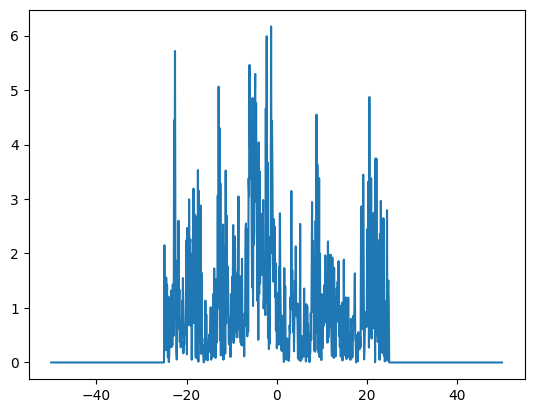

In [142]:
plt.figure() 
#plt.plot(g.xi[0][0], np.abs(psix_arr[0][len(psix_arr[0])//2])**2)

plt.plot(g.xi[0][0], np.abs(psix_arr_d[0][len(psix_arr_d[0])//2])**2)

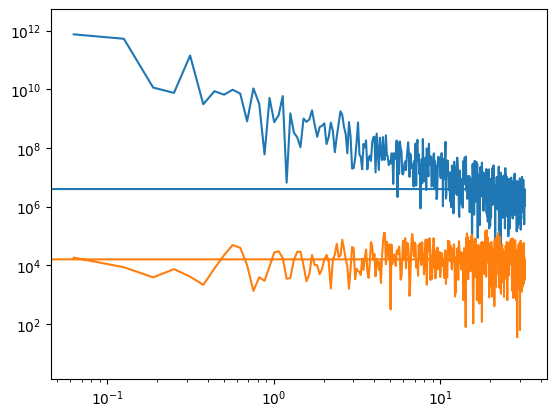

In [138]:
plt.figure() 
plt.plot(g.ki[0][0][1:], np.abs(fft2(psix_arr[0])[0][1:])**2)

plt.plot(g.ki[0][0][1:], np.abs(fft2(psix_arr_d[0])[0][1:])**2)

plt.yscale('log')
plt.xscale('log')

Testing the DST and IDST 

- Try shifting the indices of the inner box to have the starting point at x = 0 

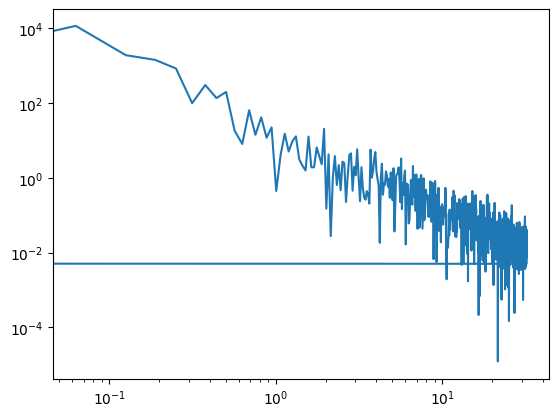

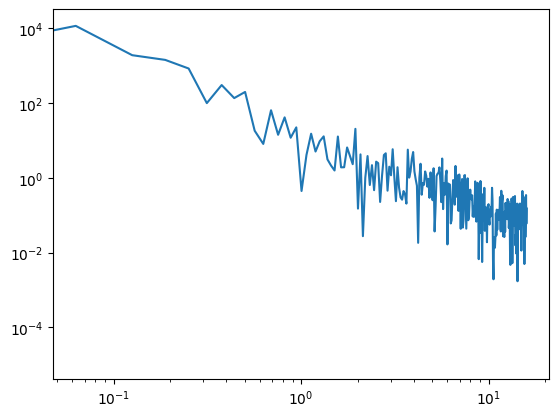

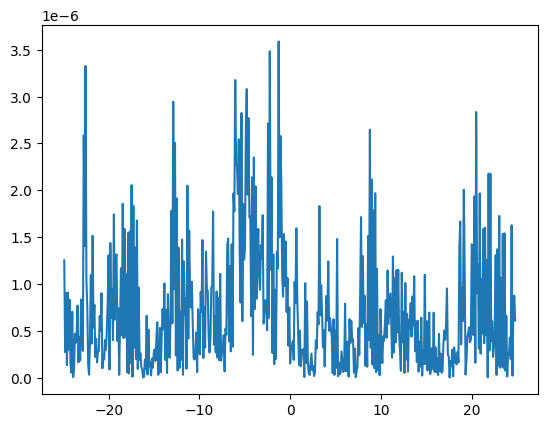

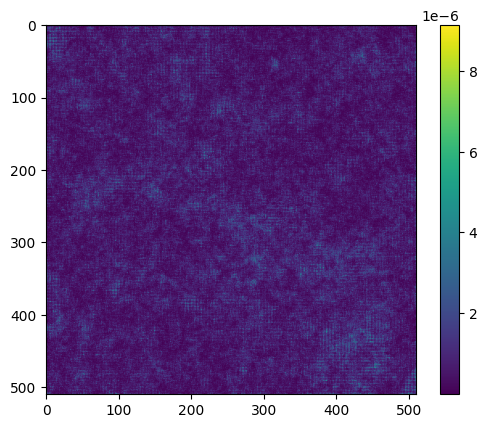

In [176]:
# make a wavefunction of the thermal wavefunction in k space of just the inner box
psik_th = ksamples_d[0]
plt.figure() 
plt.plot(g.ki[0][0], np.abs(psik_th[0])**2)
plt.yscale('log')
plt.xscale('log')

# extract the inner box wavefunction within the simulation to perform the idst on (this is still in k space)
innerbox = ifftshift(psik_th)[257:767, 257:767]
plt.figure() 
plt.plot(ifftshift(g.ki[0][0])[257:767], np.abs(innerbox[len(innerbox)//2])**2)
plt.yscale('log')
plt.xscale('log')

# perform the idst to convert the box from k space to position space 
psix_th = idstn(innerbox, type = 1) 
plt.figure() 
plt.plot(g.xi[0][0][257:767], np.abs(psix_th[len(psix_th)//2])**2)

# plot a heat map of the inner box in position space to see what the noise looks like 
plt.figure() 
plt.imshow(np.abs(psix_th)**2)
plt.colorbar() 
# as shown in the heat map, the noise is uniform and small in the heat map - might need to scale this by some coefficient to make the noise correct 

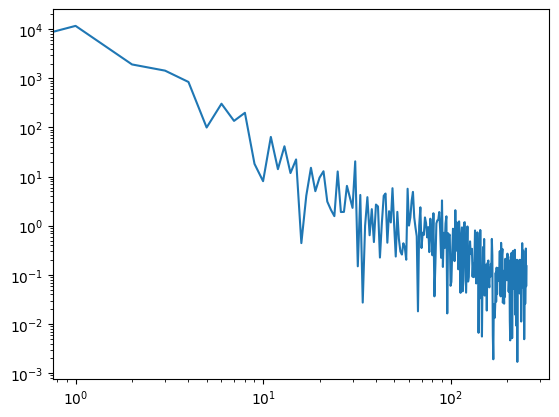

In [225]:
innerbox = ifftshift(psik_th)[257:767, 257:767]
plt.figure() 
plt.plot( np.abs(innerbox[len(innerbox)//2][len(innerbox)//2:])**2)
plt.yscale('log')
plt.xscale('log')

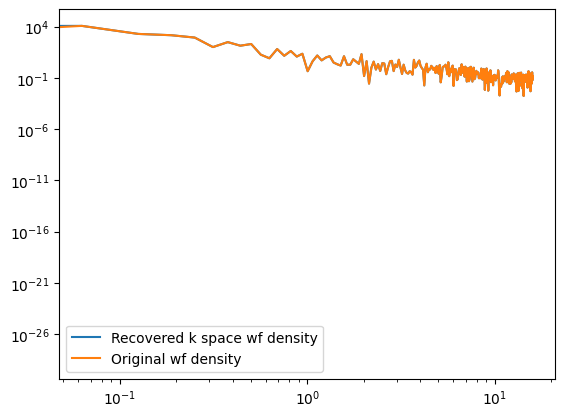

In [183]:
# make sure that re-inverting the position space wavefunction recovers the 1/k^2 dependence and the original wavefunction, compare to performing fft2 on the wavefunction

# apply dst to invert idst and convert back to k space 
psik_th_recovered = dstn(psix_th, type = 1)
plt.figure() 
plt.plot(ifftshift(g.ki[0][0])[257:767], np.abs(psik_th_recovered[len(psik_th_recovered)//2])**2, label = 'Recovered k space wf density')
plt.plot(ifftshift(g.ki[0][0])[257:767], np.abs(innerbox[len(innerbox)//2])**2, label = 'Original wf density')
plt.yscale('log')
plt.xscale('log')
plt.legend() 
# the original wavefunction is recovered from performing the dst on the psix_th as expected 

(510, 510)


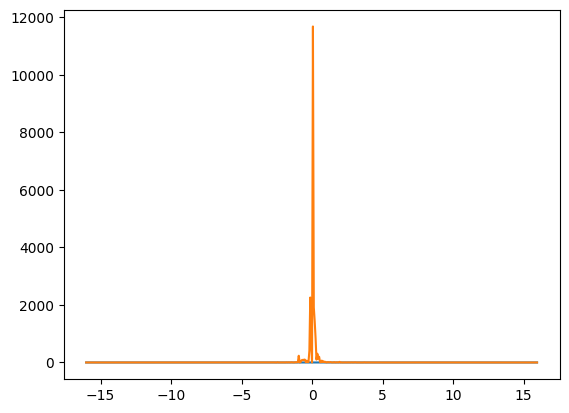

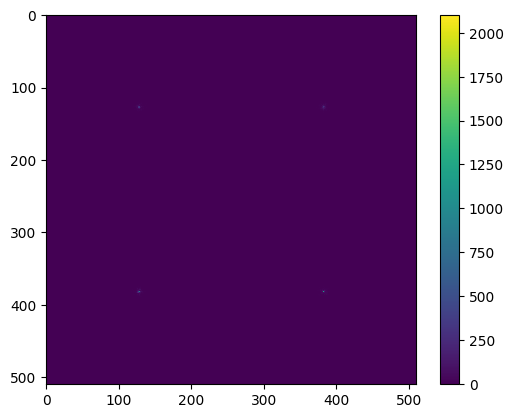

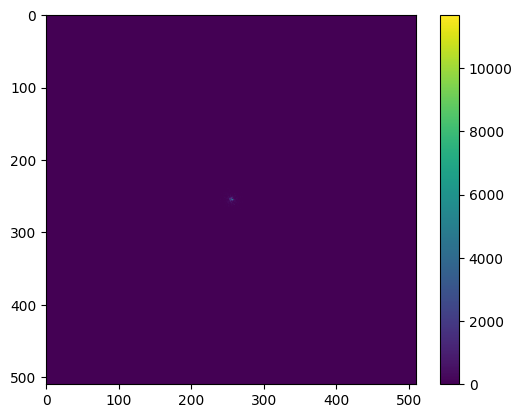

In [195]:
# compare the result here to using the fft2 on the psix_th to yield a result in k space 
psik_th_recovered_fft = fft2(psix_th) 
psik_th_recovered = dstn(psix_th, type = 1)
print(np.shape(psik_th_recovered_fft))
plt.figure() 
plt.plot(ifftshift(g.ki[0][0])[257:767], np.abs(psik_th_recovered_fft[len(psik_th_recovered_fft)//2])**2, label = 'Recovered k space wf density FFT')
plt.plot(ifftshift(g.ki[0][0])[257:767], np.abs(psik_th_recovered[len(psik_th_recovered)//2])**2, label = 'Recovered k space wf density DST')

plt.figure() 
plt.imshow(np.abs(psik_th_recovered_fft)**2) # figure out where these spikes are and plot them, make sure they have 1/k^2 dependence 
plt.colorbar() 

plt.figure() 
plt.imshow(np.abs(psik_th_recovered)**2)
plt.colorbar()

In [ ]:
# compare the psix_th results between 

[[2.39383889e-06 3.17441902e-07 3.58203134e-06 ... 1.17628610e-07
  1.18973892e-06 3.34880856e-08]
 [1.10960927e-07 2.43492852e-07 2.09657239e-08 ... 9.03130686e-07
  8.98353883e-08 1.23954568e-07]
 [1.16458356e-06 1.95363336e-07 3.05309075e-06 ... 3.21652897e-08
  3.06828062e-07 2.89261066e-07]
 ...
 [4.25940603e-06 7.35614188e-07 4.38125087e-06 ... 2.14748728e-06
  4.55073330e-07 2.22765327e-06]
 [1.66070880e-07 5.57520734e-08 2.36403004e-07 ... 2.10195510e-07
  3.02167006e-07 2.04461838e-07]
 [5.01487142e-06 3.85929302e-07 4.44036058e-06 ... 4.18564798e-06
  3.66619551e-07 1.47069480e-06]]

[[2.29109083e-06 1.82233422e-06 2.36504221e-06 ... 5.52121146e-06
  4.81902781e-06 8.20734574e-06]
 [1.65863325e-06 2.19957251e-06 2.48488480e-06 ... 3.86422594e-06
  6.51668377e-06 2.22359981e-06]
 [3.28870222e-06 2.45034221e-06 5.15868884e-07 ... 3.57504519e-06
  1.26806505e-05 5.26541855e-06]
 ...
 [2.83257899e-06 4.72270839e-07 2.07897255e-06 ... 1.10255649e-05
  1.13308156e-05 3.90731111e-06

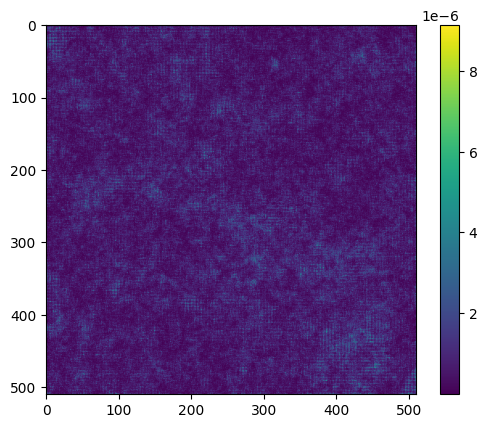

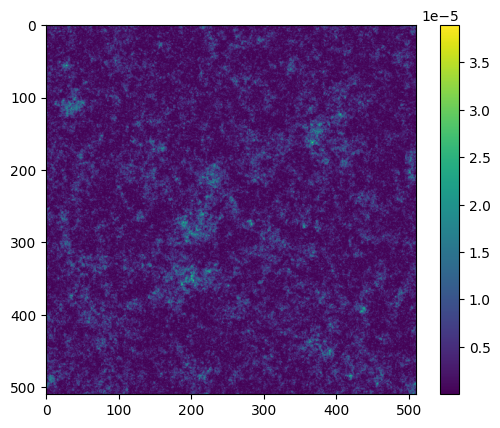

In [215]:
# testing the output of fft2 on an idst transformed array 
arr = innerbox

arr_idst = idstn(arr, type = 1)
arr_ifft = ifft2(arr)

plt.figure() 
plt.imshow(np.abs(arr_idst)**2)
plt.colorbar() 

plt.figure() 
plt.imshow(np.abs(arr_ifft)**2)
plt.colorbar() 
print(np.abs(arr_idst)**2)
print('') 
print(np.abs(arr_ifft)**2)